In [1]:
import kagglehub

path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")
print("Path to dataset files:", path)

100%|██████████| 1.47M/1.47M [00:03<00:00, 454kB/s]

Extracting files...
Path to dataset files: C:\Users\DELL\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(f'{path}/books.csv')

In [4]:
data.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


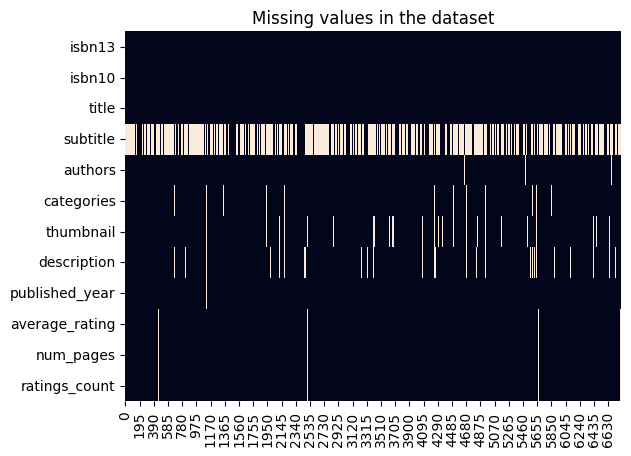

In [8]:
ax = plt.axes()
sns.heatmap(data.isnull().transpose(),cbar=False, ax=ax)
ax.set_title('Missing values in the dataset')
plt.show()

In [11]:
data['missing_description'] = np.where(data['description'].isnull(), 1, 0)
data['book_age'] = 2024 - data['published_year']

In [12]:
columns_of_interest = ['num_pages','book_age','missing_description','average_rating']
correlation_matrix = data[columns_of_interest].corr(method='spearman')

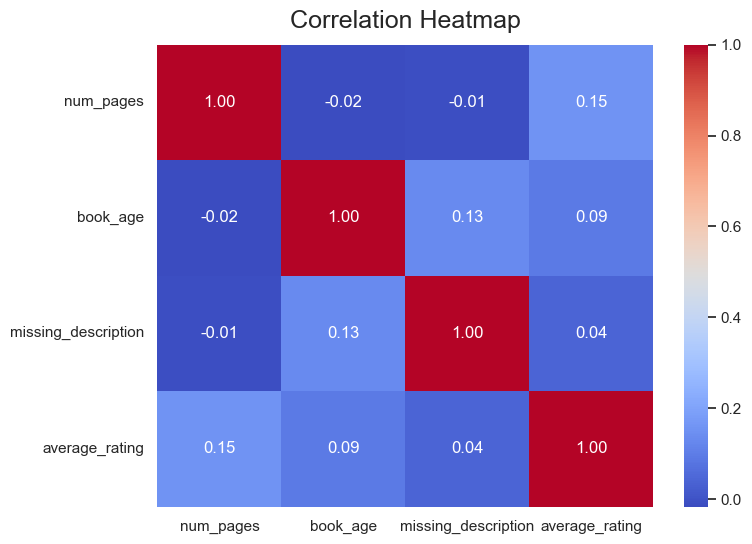

In [14]:
sns.set_theme(style="white") 
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.show()

In [20]:
data_missing = data[(
    ~(data['num_pages'].isnull()) &
     ~(data['published_year'].isnull()) &
      ~(data['description'].isnull()) &
       ~(data['average_rating'].isnull())
)]

In [26]:
data_missing.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,book_age
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,42.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0


In [33]:
data_missing['categories'].value_counts().reset_index().sort_values(by='count', ascending=False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
280,Butlers,1
279,Gardens,1
278,Assassins,1
277,Married people,1


In [34]:
data_missing['words_sentence'] = data_missing['description'].apply(lambda x: len(x.split()))

C:\Users\DELL\AppData\Local\Temp\ipykernel_8252\3927847515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_missing['words_sentence'] = data_missing['description'].apply(lambda x: len(x.split()))


In [36]:
data_missing[data_missing['words_sentence'] == 1]

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,book_age,words_sentence
6,9780006353287,0006353282,An Autobiography,NaN,Agatha Christie,"Authors, English",http://books.google.com/books/content?id=c49GQ...,Donation.,1977.0,4.27,560.0,3975.0,0,47.0,1
11,9780006480099,0006480098,Assassin's Apprentice,NaN,Robin Hobb,American fiction,http://books.google.com/books/content?id=qTaGQ...,Fantasy-roman.,1996.0,4.15,460.0,133972.0,0,28.0,1
1346,9780261102200,0261102206,The Treason of Isengard,"The History of the Lord of the Rings, Part Two",John Ronald Reuel Tolkien;Christopher Tolkien,English fiction,http://books.google.com/books/content?id=Hon4P...,Fantasy-roman.,2002.0,4.16,465.0,93.0,0,22.0,1
1981,9780373484416,0373484410,Time & Again,Parts 2 and 3,Nora Roberts,Man-woman relationships,NaN,Romance.,2001.0,3.76,505.0,7434.0,0,23.0,1
2946,9780449146972,0449146979,The Changeling,NaN,Philippa Carr,Fiction,http://books.google.com/books/content?id=5jE31...,FICTION-ROMANCE/GOTHIC,1990.0,3.99,369.0,341.0,0,34.0,1
3364,9780552133258,0552133256,Strata,NaN,Terry Pratchett,English fiction,http://books.google.com/books/content?id=SUaZQ...,Fantasy-roman.,1988.0,3.49,285.0,8754.0,0,36.0,1
5015,9780804721288,0804721289,Taking God Out of Mathematics and Putting the ...,An Essay in Corporeal Semiotics,Brian Rotman,Philosophy,http://books.google.com/books/content?id=BQujR...,See:,1993.0,4.06,224.0,17.0,0,31.0,1
5090,9780807123331,0807123331,The Collected Poems of Robert Penn Warren,NaN,Robert Penn Warren;John Burt,Poetry,http://books.google.com/books/content?id=tBMN6...,?,1998.0,4.37,838.0,170.0,0,26.0,1
5135,9780811212472,0811212475,The Crack-up,NaN,Francis Scott Fitzgerald,Literary Collections,http://books.google.com/books/content?id=B8saL...,(Autobiographical).,1993.0,3.92,347.0,2410.0,0,31.0,1
5243,9780813510996,0813510996,The Story of Avis,NaN,Elizabeth Stuart Phelps;Carol Farley Kessler,Biography & Autobiography,http://books.google.com/books/content?id=i_WQS...,.,1985.0,3.55,250.0,168.0,0,39.0,1


In [37]:
data_missing.loc[data_missing['words_sentence'].between(1, 4), 'description']

6                                           Donation.
11                                     Fantasy-roman.
748              Includes bibliographical references.
770                             Bound For Oregon (PB)
775                                No Marketing Blurb
812                                No Marketing Blurb
857                          First published in 1813.
944                         Edited by Maurice Hindle.
953                        DEFOE/ROBINSON CRUSOE (BC)
954                             Edited by John Carey.
962                         ALLEN/GETTING THINGS DONE
1054                            GILBERT/EAT PRAY LOVE
1056    "Graham Greene centennial, 1904-2004"--Cover.
1060                   STEINBECK/GRAPES OF WRATH (BC)
1346                                   Fantasy-roman.
1546                                      Winter 2003
1610                                      Winter 1999
1813                             National bestseller.
1981                        

In [38]:
data_missing.loc[data_missing['words_sentence'].between(5, 14), 'description']

2       Volume Two of Stephen Donaldson's acclaimed se...
38      Koko is Peter Straub's foray into the psycholo...
70      A matter of life and death - and the Throne of...
77                         Nonsense rhyming story. 4 yrs+
84      A study guide for the novel There's a Boy in t...
                              ...                        
6715    The first comprehensive guide to addressing Na...
6726       Presents two complete novels from Henry James.
6757                          Audio Book- unabriged on CD
6776    Raymond Chandler meets The Exorcist. Classic n...
6795    Book Of Five Rings is a Kodansha International...
Name: description, Length: 308, dtype: object

In [39]:
data_missing.loc[data_missing['words_sentence'].between(15, 24), 'description']

10      One of Sidney Sheldon's most popular and bests...
32      Tells the story of three generations of Chines...
36      A magical and fantastic collection of early st...
57      A young drifter finds more than he bargained f...
68      A new 'The Doors of Perception' for the 21st c...
                              ...                        
6767    Everything from the fingerprints of the gods t...
6782    Displays one of America's leading physicist's ...
6783    Basics Illustration 01: Thinking Visually expl...
6789    Provides an introduction to the American artis...
6809    This is a jubilant and rewarding collection of...
Name: description, Length: 947, dtype: object

In [40]:
data_missing.loc[data_missing['words_sentence'].between(25, 34), 'description']

9       Kate Blackwell is an enigma and one of the mos...
14      Available in the U.S. for the first time, this...
20      It is 1937, and Charles Ashworth, a Canon to t...
21      Reissue of the author's most famous and well-l...
46      No one believes a little girl when she insists...
                              ...                        
6760    Joel, an English teacher, has never really lik...
6766    Discusses the historical and intellectual back...
6775    Presents nearly one thousand recipes--from app...
6779    Edited by the creator and executive producer o...
6799    This book is the story of a young girl obsesse...
Name: description, Length: 1229, dtype: object

In [47]:
data_threshold = data_missing[data_missing['words_sentence'] >= 25]

In [48]:
data_threshold.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,book_age,words_sentence
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0,205
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0,45
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,22.0,75


In [49]:
data_threshold['title_subtitle'] = (np.where(data_threshold['subtitle'].isna(), data_threshold['title'], data_threshold['title'] + ' ' + data_threshold['subtitle']))

C:\Users\DELL\AppData\Local\Temp\ipykernel_8252\802452197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_threshold['title_subtitle'] = (np.where(data_threshold['subtitle'].isna(), data_threshold['title'], data_threshold['title'] + ' ' + data_threshold['subtitle']))


In [50]:
data_threshold.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,book_age,words_sentence,title_subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0,205,Spider's Web A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0,57,Rage of angels
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0,45,The Four Loves
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,22.0,75,The Problem of Pain


In [52]:
data_threshold['tagged_description'] = data_threshold[['isbn13','title_subtitle','description']].astype(str).agg(' '.join, axis=1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8252\603769438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_threshold['tagged_description'] = data_threshold[['isbn13','title_subtitle','description']].astype(str).agg(' '.join, axis=1)


In [56]:
data_cleaned = data_threshold.drop(columns=['subtitle','missing_description','book_age','words_sentence'])

In [57]:
data_cleaned.head()

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_subtitle,tagged_description
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 Gilead A NOVEL THAT READERS and ...
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web A Novel,9780002261982 Spider's Web A Novel A new 'Chri...
3,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 Rage of angels A memorable, mesm..."
4,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves,9780006280897 The Four Loves Lewis' work on th...
5,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain,"9780006280934 The Problem of Pain ""In The Prob..."


In [58]:
data_cleaned.to_csv('data_cleaned.csv', index=False)